ans = THE CLEAREST NEURAL NETWORK FRAMEWORK BY UNDWAD
classes = [0 1]
X1 = matrix [2 211]
Y1 = matrix [1 211]
X2 = matrix [2 200]
Y2 = matrix [1 200]
BBB = cell [1 1]
BBB{1}.X = matrix [2 211]
BBB{1}.Y = matrix [1 211]

starts_at = 10-Jun-2020 07:07:34
GRAD_DIFF = 0.000006
params_checked = 263

1: 0.890141       accuracy: 0.298578                                                              
16: 0.203272 ↓    accuracy: 0.943128                                                              
17: 0.203544 ↑    accuracy: 0.943128                                                              
101: 0.129646 ↓   accuracy: 0.952607                                                              

GRAD_DIFF = 0.329291
params_checked = 259
overall: objective ↓, accuracy ↑
ends_at = 10-Jun-2020 07:07:46

train data after
class = 0
metrics =

  scalar structure containing the fields:

    total =  211
    TP =  105
    TN =  79
    FP = 0
    FN =  27
    precision =  1
    recall =  0.79545
    F1 =  

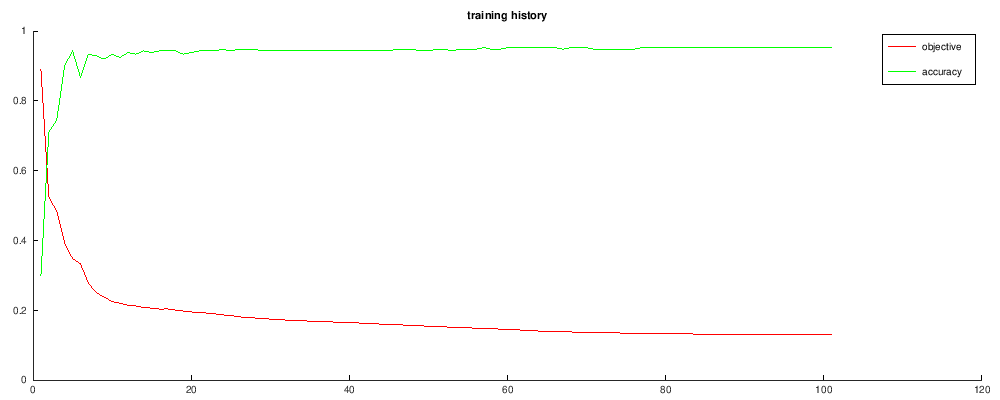

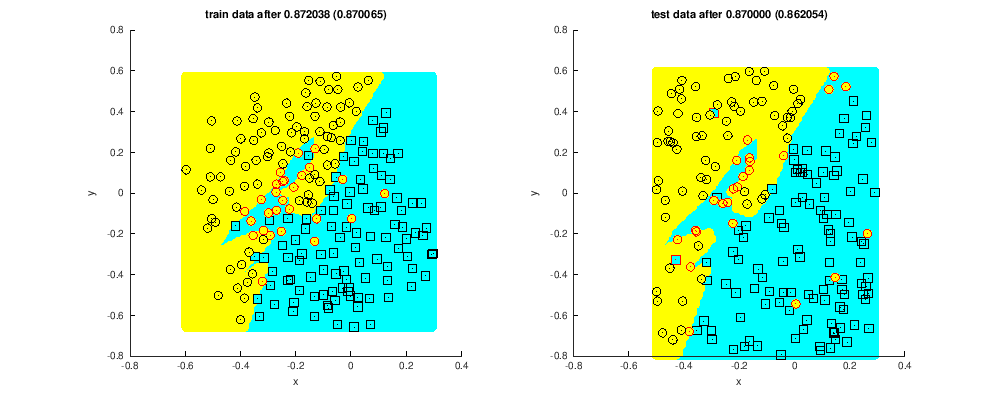

In [10]:
global ipynb = 'classification-1';

source('clearest-nn.m');
source('utils-logging.m');
source('utils-training.m');
source('utils-plotting.m');

data = load('datasets/data1.mat');
X1 = data.X';
Y1 = data.y';
X2 = data.Xval';
Y2 = data.yval';

classes = [0,1];

printvar('classes');

printsize('X1');
printsize('Y1');
printsize('X2');
printsize('Y2');

rand('state', 1);

BBB = minibatches(X1, Y1);

printsize('BBB');
printsize('BBB{1}.X');
printsize('BBB{1}.Y');

function test(CTX, classes, X1, Y1, X2, Y2, BBB, times=101)
    CTX = objective(CTX, 'binlogloss');
    % printmodel('CTX');
    CTX = TRAIN(CTX, BBB, times);    
    plot_both('after', X1, Y1, X2, Y2, classes, CTX);
end

CTX = model(2, {'maxout', 20}, 'batchnorm', {'maxout', 3}, 'batchnorm', {'maxout', 1}, 'sigmoid');
CTX = optimization( CTX, {'L2_regularization', 0.1}, {'rprop', 0.1});
test(CTX, classes, X1, Y1, X2, Y2, BBB);


In [ ]:
CTX = model(2, {'dense', 20}, 'relu', {'dense', 3}, 'relu', {'dense', 1}, 'sigmoid');
CTX = optimization( CTX, {'adam', 0.1});
test(CTX, classes, X1, Y1, X2, Y2, BBB);

In [ ]:
CTX = model(2, {'dense', 20}, 'tanh', {'dense', 3}, 'tanh', {'dense', 1}, 'sigmoid');
CTX = optimization( CTX, {'gradient_clipping', 0.25}, {'adam', 0.1});
test(CTX, classes, X1, Y1, X2, Y2, BBB);

In [ ]:
CTX = model(2, {'dense', 20}, 'relu', {'dense', 3}, 'relu', {'dense', 1}, 'sigmoid');
CTX = optimization( CTX, {'gradient_clipping', 0.25}, {'adam', 0.1});
test(CTX, classes, X1, Y1, X2, Y2, BBB);

In [ ]:
CTX = model(2, {'dense', 20}, 'relu', {'dense', 3}, 'relu', {'dense', 1}, 'sigmoid');
CTX = optimization( CTX, {'L2_regularization', 0.1}, {'adam', 0.1});
test(CTX, classes, X1, Y1, X2, Y2, BBB);

In [ ]:
CTX = model(2, {'dense', 20}, 'relu', {'dropout', 0.80}, {'dense', 3}, 'relu', {'dense', 1}, {'dropout', 0.80}, 'sigmoid');
CTX = optimization( CTX, {'adam', 0.1});
test(CTX, classes, X1, Y1, X2, Y2, BBB);

In [ ]:
CTX = model(2, {'dense', 20}, 'relu', {'dropout', 0.80}, {'dense', 3}, 'relu', {'dense', 1}, {'dropout', 0.80}, 'sigmoid');
CTX = optimization( CTX, {'gradient_clipping', 0.25}, {'adam', 0.1});
test(CTX, classes, X1, Y1, X2, Y2, BBB);

In [ ]:
CTX = model(2, {'dense', 20}, 'relu', {'dropout', 0.80}, {'dense', 3}, 'relu', {'dense', 1}, {'dropout', 0.80}, 'sigmoid');
CTX = optimization( CTX, {'L2_regularization', 0.1}, {'adam', 0.1});
test(CTX, classes, X1, Y1, X2, Y2, BBB);

In [ ]:
CTX = model(2, {'dense', 20}, 'batchnorm', 'relu', {'dropout', 0.80}, {'dense', 3}, 'batchnorm', 'relu', {'dense', 1}, {'dropout', 0.80}, 'sigmoid');
CTX = optimization( CTX, {'L2_regularization', 0.1}, {'adam', 0.1});
test(CTX, classes, X1, Y1, X2, Y2, BBB);